In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [5]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
#Implement Simple Naïve Bayes classification algorithm
X = df.iloc[:, :-1].values  # Selecting all columns except the last as independent variables
y = df.iloc[:, -1].values  # Target variable (Species)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype='<U15')

In [17]:
# Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.
cm = confusion_matrix(y_test, y_pred)
TP = np.diag(cm)  # True Positives
FP = cm.sum(axis=0) - TP  # False Positives
FN = cm.sum(axis=1) - TP  # False Negatives
TN = cm.sum() - (TP + FP + FN)  # True Negatives

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

In [19]:
print("Confusion Matrix:")
print(cm)
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Confusion Matrix:
[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
True Positives (TP): [13 16  9]
False Positives (FP): [0 0 0]
True Negatives (TN): [25 22 29]
False Negatives (FN): [0 0 0]
Accuracy: 1.00
Error Rate: 0.00
Precision: 1.00
Recall: 1.00


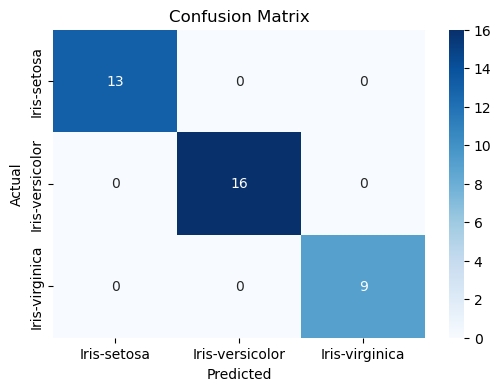

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), 
            yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [25]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

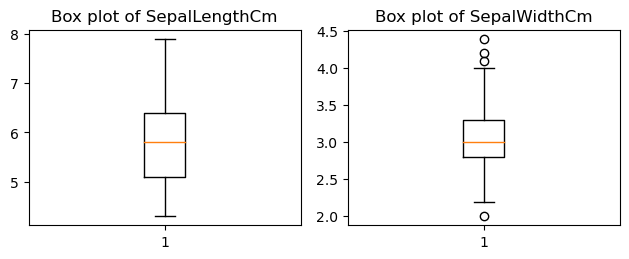

In [28]:
def showOutliers():
    for i, col in enumerate(['SepalLengthCm', 'SepalWidthCm']):
        plt.subplot(2, 2, i+1)
        plt.boxplot(df[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()
showOutliers()

In [31]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    df = df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


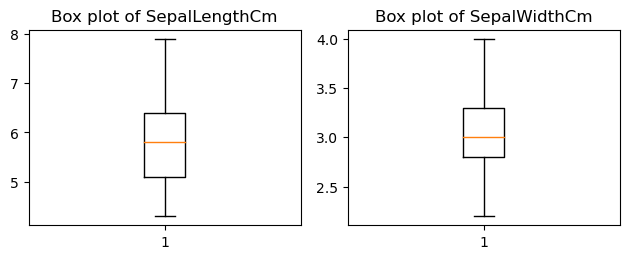

In [33]:
showOutliers()

In [36]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(df[df.select_dtypes(include=np.number).columns])
print("Normalized Data (Min-Max Scaling):")
print(normalized_data)

Normalized Data (Min-Max Scaling):
[[0.         0.22222222 0.72222222 0.06779661 0.04166667]
 [0.00671141 0.16666667 0.44444444 0.06779661 0.04166667]
 [0.01342282 0.11111111 0.55555556 0.05084746 0.04166667]
 [0.02013423 0.08333333 0.5        0.08474576 0.04166667]
 [0.02684564 0.19444444 0.77777778 0.06779661 0.04166667]
 [0.03355705 0.30555556 0.94444444 0.11864407 0.125     ]
 [0.04026846 0.08333333 0.66666667 0.06779661 0.08333333]
 [0.04697987 0.19444444 0.66666667 0.08474576 0.04166667]
 [0.05369128 0.02777778 0.38888889 0.06779661 0.04166667]
 [0.06040268 0.16666667 0.5        0.08474576 0.        ]
 [0.06711409 0.30555556 0.83333333 0.08474576 0.04166667]
 [0.0738255  0.13888889 0.66666667 0.10169492 0.04166667]
 [0.08053691 0.13888889 0.44444444 0.06779661 0.        ]
 [0.08724832 0.         0.44444444 0.01694915 0.        ]
 [0.09395973 0.41666667 1.         0.03389831 0.04166667]
 [0.10738255 0.30555556 0.94444444 0.05084746 0.125     ]
 [0.11409396 0.22222222 0.72222222 0.